# Least Squares Method (최소 자승법)

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # 사각형 패치를 사용하기 위해 명시적으로 import


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def l2_loss(w, b, x, y): #선형 회귀 모델의 L2 손실(제곱합 오차)을 계산

    y_predicted = w * x + b
    errors = y_predicted - y
    return np.sum(np.square(errors))

def visualize_l2(w, b, x_train, y_train, loss):
    
    loss_name = loss.__name__

    plt.plot(x_train, y_train, 'ok', markerfacecolor='none', label='Data Points') 

    plt.plot(x_train, w * x_train + b, '--k', label=f'y = {w:.2f}x + {b:.2f}') 

    currentAxis = plt.gca()

    for xx, yy in zip(x_train, y_train):
        y_predicted_at_point = w * xx + b
        
        residual = y_predicted_at_point - yy
        
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        residual, residual, 
                                        alpha=0.1, 
                                        facecolor='gray', 
                                        edgecolor='k')) 

   
    plt.grid(True) 
    plt.axis('equal') 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend() 

    total_loss = loss(w, b, x_train, y_train)

    plt.title(f"w={w:1.2f}, b={b:1.2f} ({loss_name}={total_loss:5.4f})")

# -----------------------------------------------------------------------------
# 메인 실행 부분
# -----------------------------------------------------------------------------

x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(15, 9)) 

plt.subplot(2, 2, 1)
visualize_l2(0.2, 1.0, x_train, y_train, l2_loss)
plt.title("Scenario 1: w=0.2, b=1.0 (Poor Fit)") 

plt.subplot(2, 2, 2)
visualize_l2(-0.8, 1.0, x_train, y_train, l2_loss)
plt.title("Scenario 2: w=-0.8, b=1.0 (Closer Fit)")

plt.subplot(2, 2, 3)
visualize_l2(0.2, -1.0, x_train, y_train, l2_loss)
plt.title("Scenario 3: w=0.2, b=-1.0 (Poor Fit)")

plt.subplot(2, 2, 4)
visualize_l2(-1, 1, x_train, y_train, l2_loss)
plt.title("Scenario 4: w=-1.0, b=1.0 (Optimal Fit)")

plt.tight_layout()

plt.show()

# 절댓값 합만 고려

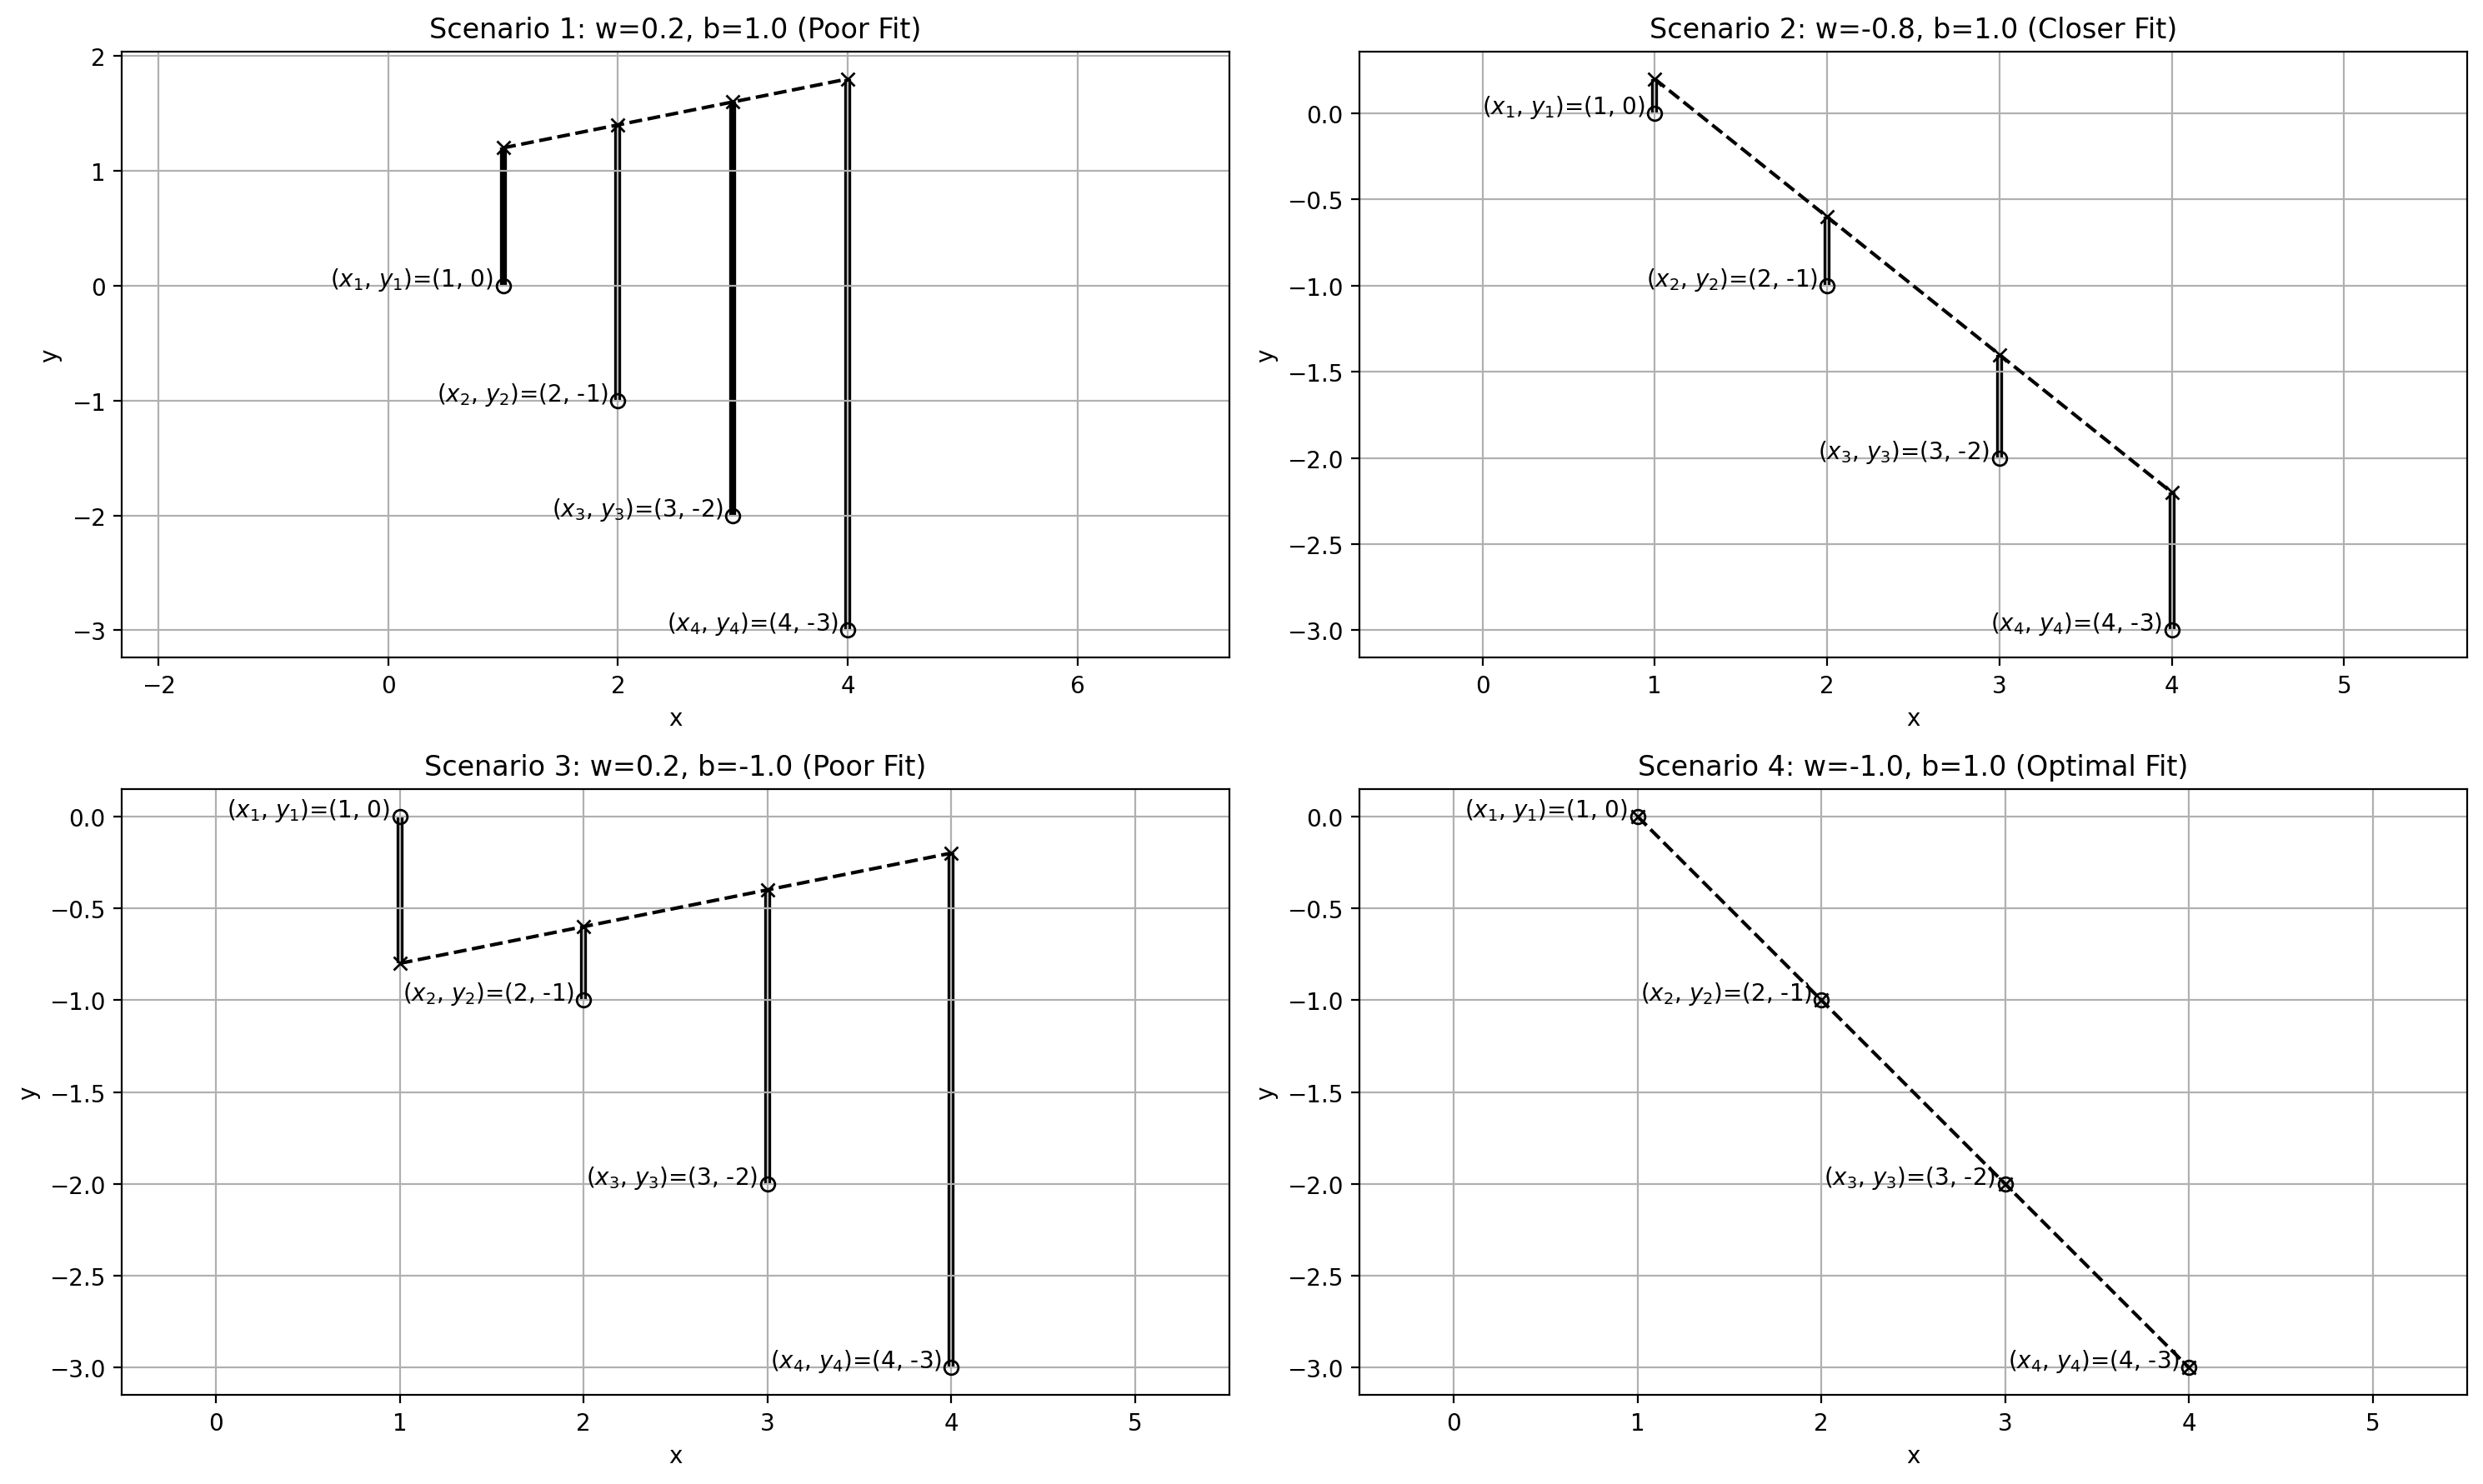

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def l1_loss(w, b, x, y):
    return np.sum(np.abs(w * x + b - y))

def visualize_l1(w, b, x_train, y_train, loss):
    loss_name = loss.__name__
    plt.plot(x_train, y_train, 'ok', markerfacecolor='none') # Added markerfacecolor for consistency
    plt.plot(x_train, w * x_train + b, '--k', marker='x') # Separate marker from line style

    residuals = w * x_train + b - y_train

    for i, (xx, yy) in enumerate(zip(x_train, y_train)):
       
        plt.text(xx, yy, f'($x_{i+1}$, $y_{i+1}$)=({xx}, {yy})  ',
                 horizontalalignment='right')

        currentAxis = plt.gca()
        currentAxis.add_patch(Rectangle((xx, yy), 0, residuals[i],
                                        alpha=1.0, facecolor='k', edgecolor='k', linewidth=3))

    plt.grid(True) # Explicitly set grid to True
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    total_loss = loss(w, b, x_train, y_train) # Calculate loss once for title
    plt.title(f"w={w:1.2f}, b={b:1.2f} ({loss_name}={total_loss:5.4f})") # Use f-string for title

x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(15, 9))

plt.subplot(2, 2, 1)
visualize_l1(0.2, 1.0, x_train, y_train, l1_loss)
plt.title("Scenario 1: w=0.2, b=1.0 (Poor Fit)") # Added subplot title

plt.subplot(2, 2, 2)
visualize_l1(-0.8, 1, x_train, y_train, l1_loss)
plt.title("Scenario 2: w=-0.8, b=1.0 (Closer Fit)")

plt.subplot(2, 2, 3)
visualize_l1(0.2, -1.0, x_train, y_train, l1_loss)
plt.title("Scenario 3: w=0.2, b=-1.0 (Poor Fit)")

plt.subplot(2, 2, 4)
visualize_l1(-1, 1, x_train, y_train, l1_loss)
plt.title("Scenario 4: w=-1.0, b=1.0 (Optimal Fit)")

plt.tight_layout() # Adjust layout
plt.show()

### 딥러닝 모델을 학습시킨다는 것은 이러한 손실함수를 가장 작게 만들어주는 웨이트(w)와 바이어스(b)의 조합을 찾는 것